In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import scipy.io
import pandas as pd

In [2]:
exposure = scipy.io.loadmat('data/psth3dMat_exp_1_raton_1ms')
coordinates = scipy.io.loadmat('data/RF_pos_exp1')

In [3]:
NODES_SAMPLE = 319
TIME_SAMPLE = 100

In [4]:
data_list = []

for neuron_idx, neuron in enumerate(exposure['psth3d_1ms']):
    
    if neuron_idx == NODES_SAMPLE:
        break

    for time_index, time in enumerate(neuron):
        if time_index == TIME_SAMPLE:
            break

        data_list.append({'neuron':neuron_idx, 'time':time_index, 'exposure':time})

In [5]:
df = pd.DataFrame(data_list)
df.head()

,exposure,neuron,time
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,4


In [6]:
df['mean'] = df['exposure'].apply(pd.Series).mean()
df['std'] = df['exposure'].apply(pd.Series).std()

In [7]:
df = df.drop(['exposure'], axis=1)
df.head()

,neuron,time,mean,std
0,0,0,0.001254,0.035389
1,0,1,0.001818,0.042602
2,0,2,0.001630,0.040342
3,0,3,0.001411,0.037533
4,0,4,0.001536,0.039163


## Coordinates

In [8]:
df_coordinates = pd.DataFrame(coordinates['xyposexp1']).rename({0:'x', 1:'y'}, axis='columns')
df_coordinates['neuron'] = df_coordinates.index
df_coordinates[['neuron','x','y']].head()

,neuron,x,y
0,0,25.125694,31.268716
1,1,25.319985,16.599247
2,2,27.395892,15.984191
3,3,26.179770,16.742830
4,4,14.746350,28.460502


In [9]:
df_data_plot = pd.merge(df, df_coordinates, how='inner', on='neuron').fillna(0)
df_data_plot.head()

,neuron,time,mean,std,x,y
0,0,0,0.001254,0.035389,25.125694,31.268716
1,0,1,0.001818,0.042602,25.125694,31.268716
2,0,2,0.001630,0.040342,25.125694,31.268716
3,0,3,0.001411,0.037533,25.125694,31.268716
4,0,4,0.001536,0.039163,25.125694,31.268716


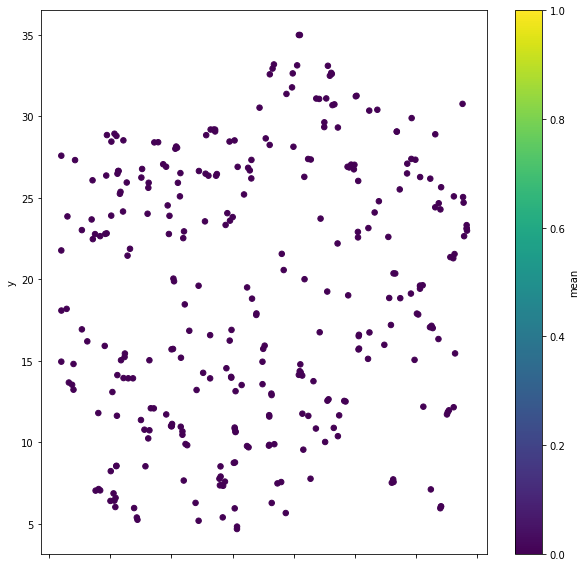

In [10]:
df_data_plot.loc[df_data_plot['time'] == 0].plot(x='x',
                                                 y='y',
                                                 kind='scatter',
                                                 c='mean',
                                                 colormap='viridis',
                                                 vmin=0, vmax=1, 
                                                 s=30, figsize= (10,10))